Exploração, análise e tratamento dos dados: Projeto previsão de doenças cardíacas

Este projeto tem o objetivo desenvolver um algoritimo de Machine Learning para prever a têndencia de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínincos e laboratoriais de  referencia

In [2]:
import numpy as np
import pandas as pd

In [3]:
dados = pd.read_csv('dados\heart.csv',
                     sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8 ou latin-1

Exploração dos Dados

In [4]:
dados.head() #Primeiros 5 registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dados.tail() #Ultimos 5 registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
dados.shape #Conta o registro 0 por isso é 918 não 917

(918, 12)

Analise das Variaveis

In [7]:
dados['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [8]:
dados['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [9]:
import plotly.express as px

In [34]:
hist1 = px.histogram (dados, x = "Age", nbins=60)
hist1.update_layout(width=600,height=400,title_text="Distribuição das idades")
hist1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [18]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Age', ylabel='Count'>

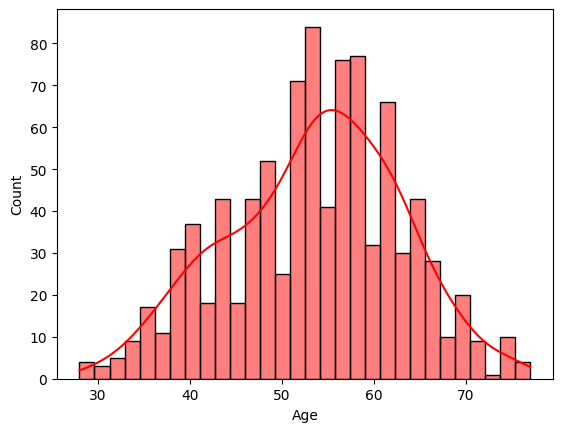

In [19]:
sns.histplot(dados, x='Age', bins=30, color="red", kde=True, stat="count")

In [ ]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

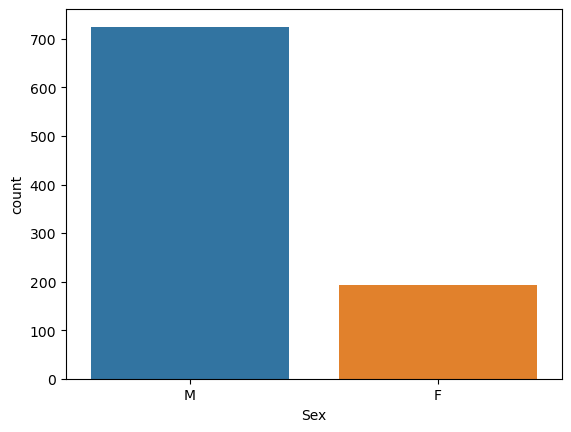

In [ ]:
sns.countplot(x= 'Sex', data=dados)

In [ ]:
dados.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


Chest Pain Type = tipo de dor no peito

In [ ]:
dados['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

ASY: assintomática
NAP: dor não anginosa
ATA: anginosa atípica
TA: anginosa típica
Anginosa: Dor no peito pela diminuição do fluxo de sangue no coração

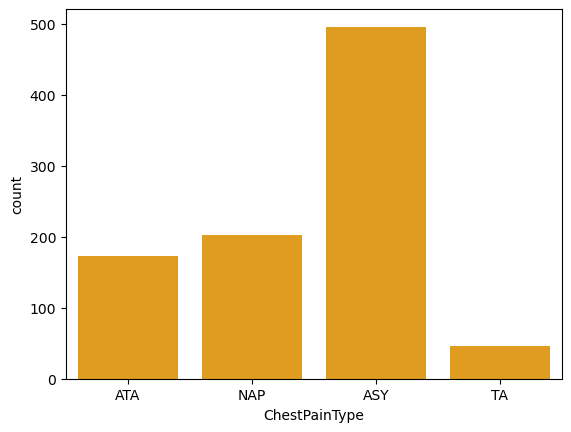

In [ ]:
sns.countplot(x="ChestPainType", data=dados, color="orange"); #caso color ; no final não aparece um texto em cima da imagem

RestingBP (blood pressure) = preção sanguínea emrepouso em mmHg(sistólica)

In [ ]:
dados['RestingBP'].value_counts().sort_index() #Primeiro dado é a preção e o segundo é a quantidade de pessoas

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

<Axes: xlabel='RestingBP', ylabel='Count'>

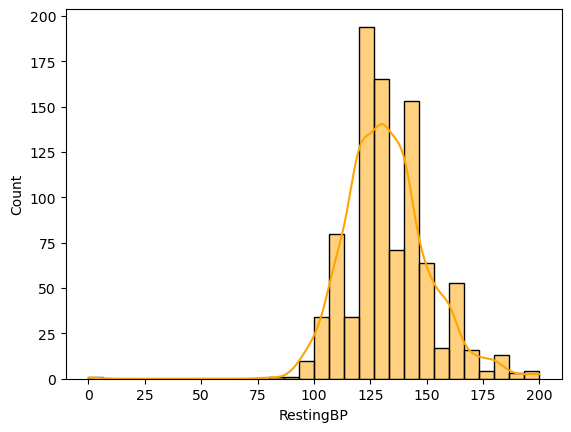

In [ ]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", kde=True, stat="count")

In [ ]:
dados['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

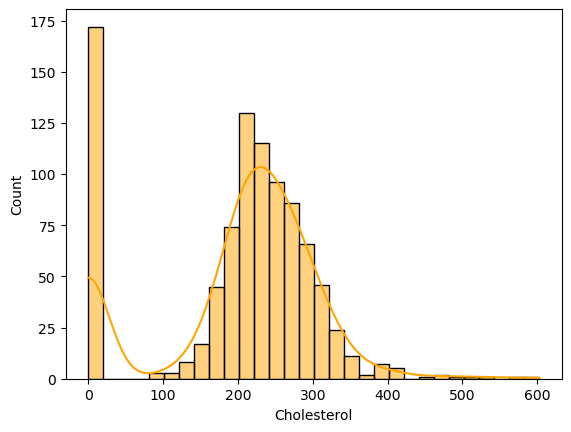

In [ ]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

FastingBS (blood sugar) = açicar no sangue em jejum (mg/dl)

In [ ]:
dados['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

0: FastingBS < 120 mg/dl (não diabetico)
1: FastingBS >= 120 mg/dl (diabetico)

<Axes: xlabel='FastingBS', ylabel='count'>

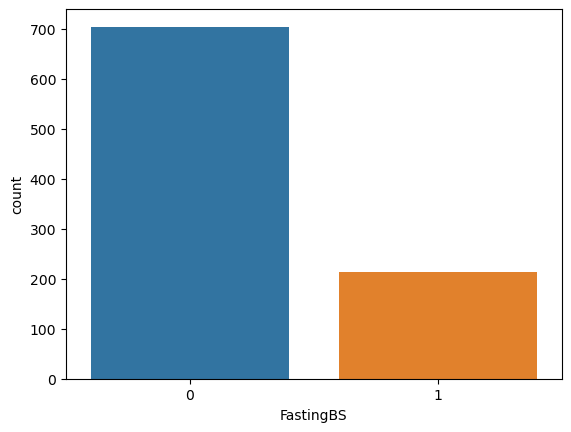

In [ ]:
sns.countplot(x='FastingBS', data=dados)

RestingECG = eletrocardiograma em repouso

In [ ]:
dados['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Normal: Normal
LVH: Hiperbole ventricular esquerda
ST: Anormalidade da onda ST-T

Segmento ST: Qualquer desnivel do ST, para cimaou para baixo deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

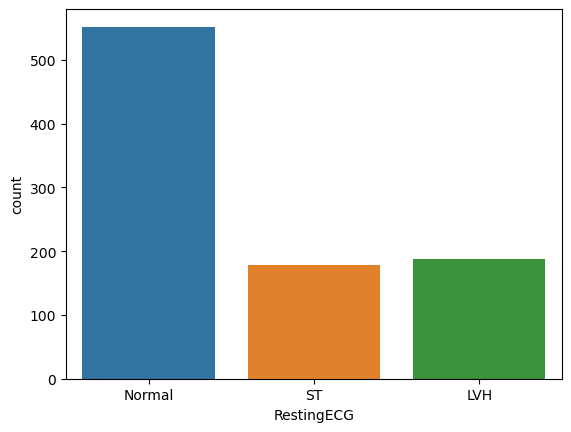

In [ ]:
sns.countplot(x='RestingECG', data=dados);

MaxHR (heart rate) = frequencia cardiaca maxima

In [ ]:
dados['MaxHR'].value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

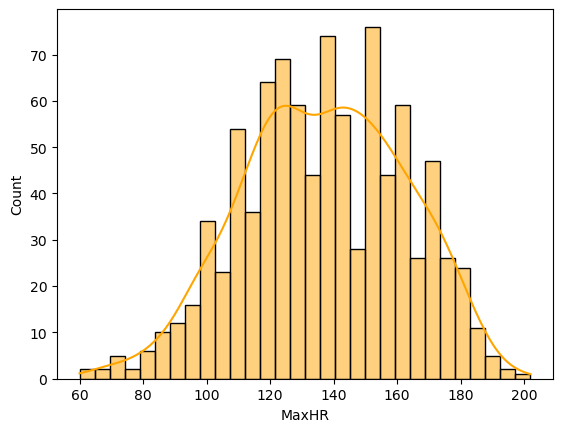

In [ ]:
sns.histplot(dados, x='MaxHR',bins=30,color='orange',kde=True, stat='count')

Exercise Angina = Angina induzida por exercicios

In [26]:
dados['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [25]:
px.pie(dados, 'ExerciseAngina');

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'ExerciseAngina=%{label}<extra></extra>',
              'labels': array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

Old Peak = Depressão de ST (referencia no ECG) introduzido por exercicios emrelação ao repouso

In [29]:
dados['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

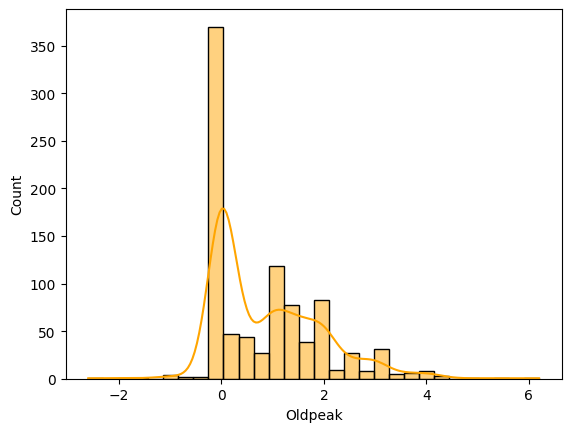

In [32]:
sns.histplot(dados, x='Oldpeak',bins=30,color='orange',kde=True, stat='count');

ST_Slope = Inclinação do segmento ST no ECG

In [33]:
dados['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Flat = plano
Up = para cima
Down = para baixo

In [37]:
px.pie(dados, 'ST_Slope');

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'ST_Slope=%{label}<extra></extra>',
              'labels': array(['Up', 'Flat', 'Up', ..., 'Flat', 'Flat', 'Up'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

Heart Disease = Doença cardiaca

In [38]:
dados['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

0: sem doença
1: doente

In [39]:
px.pie(dados, 'HeartDisease')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'HeartDisease=%{label}<extra></extra>',
              'labels': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})